In [ ]:
import pandas as pd
import pickle as pkl
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold

### Obtain Datasets

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive') # Added shortcut to drive
%cd "/content/drive/My Drive/IS4242/notebooks/data"

Mounted at /content/drive
/content/drive/My Drive/IS4242/notebooks/data


In [ ]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

X_train = X_train.drop(columns=['Unnamed: 0'])
X_test = X_test.drop(columns=['Unnamed: 0'])
y_train = y_train.drop(columns=['Unnamed: 0'])
y_test = y_test.drop(columns=['Unnamed: 0'])

### Transform Datasets

In [ ]:
with open('scaler.pkl', 'rb') as f:
    scaler = pkl.load(f)

with open('selectkbest_f_regression.pkl', 'rb') as f:
    selectkbest_f_regression = pkl.load(f)

with open('selectkbest_mutual_info_regression.pkl', 'rb') as f:
    selectkbest_mutual_info_regression = pkl.load(f)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SelectKBest from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# Scale
X_train_scaled_arr = scaler.transform(X_train)
X_test_scaled_arr = scaler.transform(X_test)

# SelectKBest
X_train_f_reg_arr = selectkbest_f_regression.transform(X_train_scaled_arr)
X_test_f_reg_arr = selectkbest_f_regression.transform(X_test_scaled_arr)

# SelectKBest
X_train_mi_reg_arr = selectkbest_mutual_info_regression.transform(X_train_scaled_arr)
X_test_mi_reg_arr = selectkbest_mutual_info_regression.transform(X_test_scaled_arr)

In [ ]:
# Transform from NumPy array to Pandas DataFrame
columns_scaled = ['crime_rate_ranking', 'area', 'contractMonth', 'distance_from_nearest_stop', 'nearest_mrt_walking_time', 'nearest_stop_num', 'nearest_taxi_stand_walking_time', 'ave_level',
                  'contractYear', 'rating', 'marketSegment_CCR', 'marketSegment_OCR', 'marketSegment_RCR', 'propertyType_Apartment', 'propertyType_Condominium', 'propertyType_Detached',
                  'propertyType_Semi-detached', 'propertyType_Strata Detached', 'propertyType_Strata Semi-detached', 'propertyType_Strata Terrace', 'propertyType_Terrace', 'typeOfArea_Land',
                  'typeOfArea_Strata', 'nearest_mrt_BENCOOLEN MRT STATION (DT21)', 'nearest_mrt_BUGIS MRT STATION (DT14)', 'nearest_mrt_BUONA VISTA MRT STATION (CC22)', 'nearest_mrt_BUONA VISTA MRT STATION (EW21)',
                  'nearest_mrt_CHINATOWN MRT STATION (NE4)', 'nearest_mrt_CITY HALL MRT STATION (EW13 / NS25)', 'nearest_mrt_CLARKE QUAY MRT STATION (NE5)', 'nearest_mrt_CLEMENTI MRT STATION (EW23)',
                  'nearest_mrt_COMMONWEALTH MRT STATION (EW20)', 'nearest_mrt_DOWNTOWN MRT STATION (DT17)', 'nearest_mrt_ESPLANADE MRT STATION (CC3)', 'nearest_mrt_FORT CANNING MRT STATION (DT20)',
                  'nearest_mrt_GREAT WORLD MRT STATION (TE15)', 'nearest_mrt_HARBOURFRONT MRT STATION (NE1 / CC29)', 'nearest_mrt_HAVELOCK MRT STATION (TE16)', 'nearest_mrt_HAW PAR VILLA MRT STATION (CC25)',
                  'nearest_mrt_KENT RIDGE MRT STATION (CC24)', 'nearest_mrt_KOVAN MRT STATION (NE13)', 'nearest_mrt_LABRADOR PARK MRT STATION (CC27)', 'nearest_mrt_LAVENDER MRT STATION (EW11)',
                  'nearest_mrt_LITTLE INDIA MRT STATION (NE7)', 'nearest_mrt_MARINA BAY MRT STATION (NS27)', 'nearest_mrt_MARINA BAY MRT STATION (TE20)', 'nearest_mrt_MARINA SOUTH PIER MRT STATION (NS28)',
                  'nearest_mrt_MAXWELL MRT STATION (TE18)', 'nearest_mrt_NICOLL HIGHWAY MRT STATION (CC5)', 'nearest_mrt_ONE-NORTH MRT STATION (CC23)', 'nearest_mrt_OUTRAM PARK MRT STATION (EW16)',
                  'nearest_mrt_OUTRAM PARK MRT STATION (NE3)', 'nearest_mrt_PASIR PANJANG MRT STATION (CC26)', 'nearest_mrt_QUEENSTOWN MRT STATION (EW19)', 'nearest_mrt_REDHILL MRT STATION (EW18)',
                  'nearest_mrt_ROCHOR MRT STATION (DT13)', 'nearest_mrt_SHENTON WAY MRT STATION (TE19)', 'nearest_mrt_TANJONG PAGAR MRT STATION (EW15)', 'nearest_mrt_TELOK AYER MRT STATION (DT18)',
                  'nearest_mrt_TELOK BLANGAH MRT STATION (CC28)', 'nearest_mrt_TIONG BAHRU MRT STATION (EW17)', 'typeOfSale_1', 'typeOfSale_2', 'typeOfSale_3', 'district_1', 'district_2',
                  'district_3', 'district_4', 'district_5', 'district_6', 'district_7', 'tenure_cat_1', 'tenure_cat_2', 'tenure_cat_3']
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=columns_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=columns_scaled)
X_train_scaled.head()

,crime_rate_ranking,area,contractMonth,distance_from_nearest_stop,nearest_mrt_walking_time,nearest_stop_num,nearest_taxi_stand_walking_time,ave_level,contractYear,rating,...,district_1,district_2,district_3,district_4,district_5,district_6,district_7,tenure_cat_1,tenure_cat_2,tenure_cat_3
0,-0.890239,-0.159886,-0.153247,0.084609,6.038920,0.430349,7.308957,-0.199105,0.593800,-0.655810,...,-0.231434,-0.228893,-0.595014,-0.29857,1.097438,-0.172511,-0.281689,0.348065,-0.126143,-0.319063
1,0.860055,-0.114023,-1.029213,-0.504859,-0.004002,-1.262743,0.000661,-0.621856,0.593800,-0.655810,...,-0.231434,-0.228893,-0.595014,-0.29857,-0.911213,-0.172511,3.550012,0.348065,-0.126143,-0.319063
2,-0.890239,-0.048505,-1.613191,0.084609,-0.004002,0.430349,0.000661,0.646398,0.593800,-0.655810,...,-0.231434,-0.228893,-0.595014,-0.29857,1.097438,-0.172511,-0.281689,0.348065,-0.126143,-0.319063
3,-1.765386,0.128393,-0.445236,0.040729,-0.004002,-1.053621,-2.880344,1.069150,-1.640994,-0.655810,...,4.320894,-0.228893,-0.595014,-0.29857,-0.911213,-0.172511,-0.281689,0.348065,-0.126143,-0.319063
4,-0.671452,-0.055057,-0.737225,-0.013628,-1.439647,-0.382335,0.000661,-0.199105,1.338731,2.186827,...,-0.231434,-0.228893,1.680633,-0.29857,-0.911213,-0.172511,-0.281689,0.348065,-0.126143,-0.319063


In [ ]:
# Transform from NumPy array to Pandas DataFrame
columns_f_reg = ['crime_rate_ranking', 'area', 'distance_from_nearest_stop', 'rating', 'marketSegment_CCR', 'marketSegment_OCR', 'propertyType_Apartment', 'propertyType_Detached', 'typeOfArea_Land', 'typeOfArea_Strata', 
           'nearest_mrt_CITY HALL MRT STATION (EW13 / NS25)', 'nearest_mrt_CLEMENTI MRT STATION (EW23)', 'nearest_mrt_ESPLANADE MRT STATION (CC3)', 'nearest_mrt_HARBOURFRONT MRT STATION (NE1 / CC29)',
           'nearest_mrt_LITTLE INDIA MRT STATION (NE7)', 'nearest_mrt_MARINA BAY MRT STATION (TE20)', 'nearest_mrt_MAXWELL MRT STATION (TE18)', 'typeOfSale_1', 'typeOfSale_3', 'district_4', 'district_5']
X_train_f_reg = pd.DataFrame(X_train_f_reg_arr, columns=columns_f_reg)
X_test_f_reg = pd.DataFrame(X_test_f_reg_arr, columns=columns_f_reg)
X_train_f_reg.head()

,crime_rate_ranking,area,distance_from_nearest_stop,rating,marketSegment_CCR,marketSegment_OCR,propertyType_Apartment,propertyType_Detached,typeOfArea_Land,typeOfArea_Strata,...,nearest_mrt_CLEMENTI MRT STATION (EW23),nearest_mrt_ESPLANADE MRT STATION (CC3),nearest_mrt_HARBOURFRONT MRT STATION (NE1 / CC29),nearest_mrt_LITTLE INDIA MRT STATION (NE7),nearest_mrt_MARINA BAY MRT STATION (TE20),nearest_mrt_MAXWELL MRT STATION (TE18),typeOfSale_1,typeOfSale_3,district_4,district_5
0,-0.890239,-0.159886,0.084609,-0.655810,-0.434214,-0.631498,0.607697,-0.069442,-0.12506,0.12506,...,-0.618851,-0.064269,-0.197375,-0.007262,-0.052942,-0.024092,0.765148,-0.738253,-0.29857,1.097438
1,0.860055,-0.114023,-0.504859,-0.655810,2.303010,-0.631498,0.607697,-0.069442,-0.12506,0.12506,...,-0.618851,-0.064269,-0.197375,-0.007262,-0.052942,-0.024092,0.765148,-0.738253,-0.29857,-0.911213
2,-0.890239,-0.048505,0.084609,-0.655810,-0.434214,-0.631498,0.607697,-0.069442,-0.12506,0.12506,...,-0.618851,-0.064269,-0.197375,-0.007262,-0.052942,-0.024092,0.765148,-0.738253,-0.29857,1.097438
3,-1.765386,0.128393,0.040729,-0.655810,2.303010,-0.631498,0.607697,-0.069442,-0.12506,0.12506,...,-0.618851,-0.064269,-0.197375,-0.007262,-0.052942,-0.024092,0.765148,-0.738253,-0.29857,-0.911213
4,-0.671452,-0.055057,-0.013628,2.186827,-0.434214,-0.631498,-1.645558,-0.069442,-0.12506,0.12506,...,-0.618851,-0.064269,-0.197375,-0.007262,-0.052942,-0.024092,-1.306937,1.354549,-0.29857,-0.911213


In [ ]:
# Transform from NumPy array to Pandas DataFrame
columns_mi_reg = ['crime_rate_ranking', 'area', 'contractMonth', 'distance_from_nearest_stop', 'nearest_mrt_walking_time', 'nearest_stop_num', 'nearest_taxi_stand_walking_time', 'ave_level',
           'contractYear', 'rating', 'marketSegment_CCR', 'marketSegment_OCR', 'marketSegment_RCR', 'propertyType_Apartment', 'propertyType_Condominium', 'nearest_mrt_CLEMENTI MRT STATION (EW23)',
           'nearest_mrt_PASIR PANJANG MRT STATION (CC26)', 'typeOfSale_1', 'typeOfSale_3', 'district_4', 'district_5']
X_train_mi_reg = pd.DataFrame(X_train_mi_reg_arr, columns=columns_mi_reg)
X_test_mi_reg = pd.DataFrame(X_test_mi_reg_arr, columns=columns_mi_reg)
X_train_mi_reg.head()

,crime_rate_ranking,area,contractMonth,distance_from_nearest_stop,nearest_mrt_walking_time,nearest_stop_num,nearest_taxi_stand_walking_time,ave_level,contractYear,rating,...,marketSegment_OCR,marketSegment_RCR,propertyType_Apartment,propertyType_Condominium,nearest_mrt_CLEMENTI MRT STATION (EW23),nearest_mrt_PASIR PANJANG MRT STATION (CC26),typeOfSale_1,typeOfSale_3,district_4,district_5
0,-0.890239,-0.159886,-0.153247,0.084609,6.038920,0.430349,7.308957,-0.199105,0.593800,-0.655810,...,-0.631498,0.893133,0.607697,-0.573899,-0.618851,2.797811,0.765148,-0.738253,-0.29857,1.097438
1,0.860055,-0.114023,-1.029213,-0.504859,-0.004002,-1.262743,0.000661,-0.621856,0.593800,-0.655810,...,-0.631498,-1.119654,0.607697,-0.573899,-0.618851,-0.357422,0.765148,-0.738253,-0.29857,-0.911213
2,-0.890239,-0.048505,-1.613191,0.084609,-0.004002,0.430349,0.000661,0.646398,0.593800,-0.655810,...,-0.631498,0.893133,0.607697,-0.573899,-0.618851,2.797811,0.765148,-0.738253,-0.29857,1.097438
3,-1.765386,0.128393,-0.445236,0.040729,-0.004002,-1.053621,-2.880344,1.069150,-1.640994,-0.655810,...,-0.631498,-1.119654,0.607697,-0.573899,-0.618851,-0.357422,0.765148,-0.738253,-0.29857,-0.911213
4,-0.671452,-0.055057,-0.737225,-0.013628,-1.439647,-0.382335,0.000661,-0.199105,1.338731,2.186827,...,-0.631498,0.893133,-1.645558,1.742465,-0.618851,-0.357422,-1.306937,1.354549,-0.29857,-0.911213


### Train the XGB model on training data

In [ ]:
# Create XGBoost regressors
regressor = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, seed=0)
regressor_scaled = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, seed=0)
regressor_f_reg = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, seed=0)
regressor_mi_reg = regressor = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, seed=0)

In [ ]:
# Using original training data
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse))

Root Mean Squared Error: 108702.188578


In [ ]:
# Using scaled training data
regressor_scaled.fit(X_train_scaled, y_train)
y_train_scaled_pred = regressor_scaled.predict(X_train_scaled)
rmse_scaled = mean_squared_error(y_train, y_train_scaled_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse_scaled))

Root Mean Squared Error: 108702.188578


In [ ]:
# Using F Regression training data
regressor_f_reg.fit(X_train_f_reg, y_train)
y_train_f_reg_pred = regressor_f_reg.predict(X_train_f_reg)
rmse_f_reg = mean_squared_error(y_train, y_train_f_reg_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse_f_reg))

Root Mean Squared Error: 176880.661950


In [ ]:
# Using MI Regression training data
regressor_mi_reg.fit(X_train_mi_reg, y_train)
y_train_mi_reg_pred = regressor_mi_reg.predict(X_train_mi_reg)
rmse_mi_reg = mean_squared_error(y_train, y_train_mi_reg_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse_mi_reg))

Root Mean Squared Error: 109086.317097


In [ ]:
y_test_mi_reg_pred = regressor_mi_reg.predict(X_test_mi_reg)
rmse_test_mi_reg = mean_squared_error(y_test, y_test_mi_reg_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse_test_mi_reg))

Root Mean Squared Error: 2854341.101172


### Hyperparameter Tuning

In [ ]:
# Create XGBoost regressors
regressor = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, seed=0)
regressor_scaled = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, seed=0)
regressor_f_reg = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, seed=0)
regressor_mi_reg = regressor = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, seed=0)

In [ ]:
# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.7, 1],
    'reg_lambda': [0.1, 1]
}

In [ ]:
# Fit model on X_train_scaled and find the best combination of hyperparameters
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_scaled = GridSearchCV(regressor_scaled, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_scaled.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,

In [ ]:
# Evaluate model on training & test sets
y_train_scaled_pred = grid_search_scaled.predict(X_train_scaled)
rmse = mean_squared_error(y_train, y_train_scaled_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse))

y_scaled_pred = grid_search_scaled.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_scaled_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse))

Root Mean Squared Error: 118838.932665
Root Mean Squared Error: 3150272.206219


In [ ]:
# Print best model hyperparameters
print(grid_search_scaled.best_params_)

{'gamma': 0, 'learning_rate': 1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 1}


In [ ]:
# Print model accuracy
print(grid_search_scaled.best_score_)

0.8726228359465619


In [ ]:
# Visualize the first decision tree produced by XGBoost
'''
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_tree(best_estimator, num_trees=0, ax=ax)
plt.show()
'''

'\nfig, ax = plt.subplots(figsize=(20, 10))\nxgb.plot_tree(best_estimator, num_trees=0, ax=ax)\nplt.show()\n'

In [ ]:
# Fit model on X_train_f_reg and find the best combination of hyperparameters
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_f_reg = GridSearchCV(regressor_f_reg, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_f_reg.fit(X_train_f_reg, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,

In [ ]:
# Evaluate model on training & test sets
y_train_f_reg_pred = grid_search_f_reg.predict(X_train_f_reg)
rmse = mean_squared_error(y_train, y_train_f_reg_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse))

y_f_reg_pred = grid_search_f_reg.predict(X_test_f_reg)
rmse = mean_squared_error(y_test, y_f_reg_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse))

Root Mean Squared Error: 237205.686472
Root Mean Squared Error: 1085479.797045


In [ ]:
# Print best model hyperparameters
print(grid_search_f_reg.best_params_)

{'gamma': 0, 'learning_rate': 1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 0.7}


In [ ]:
# Print model accuracy
print(grid_search_f_reg.best_score_)

0.8816110691804264


<Figure size 5000x3000 with 0 Axes>

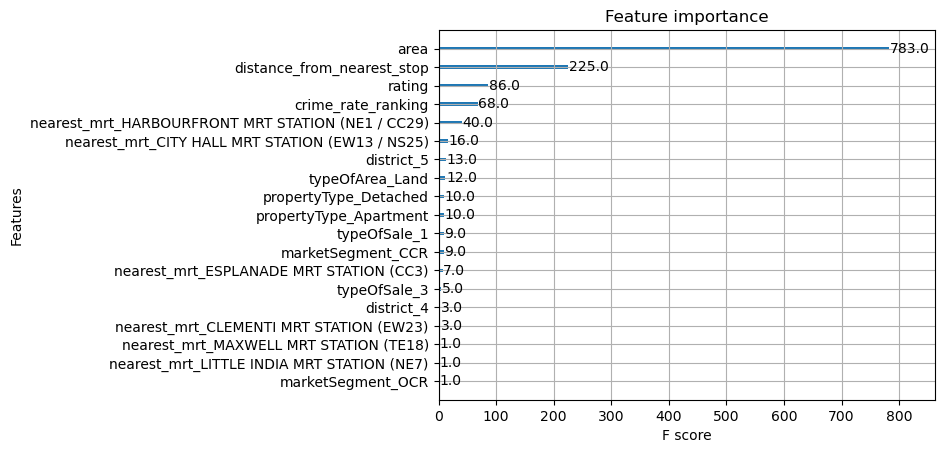

In [ ]:
# Plot feature importances
best_estimator = grid_search_f_reg.best_estimator_
plt.figure(figsize=(50, 30))
xgb.plot_importance(best_estimator)
plt.show()

In [ ]:
# Fit model on X_train_mi_reg and find the best combination of hyperparameters
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_mi_reg = GridSearchCV(regressor_mi_reg, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_mi_reg.fit(X_train_mi_reg, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,

In [ ]:
# Evaluate model on training & test sets
y_train_mi_reg_pred = grid_search_mi_reg.predict(X_train_mi_reg)
rmse = mean_squared_error(y_train, y_train_mi_reg_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse))

y_mi_reg_pred = grid_search_mi_reg.predict(X_test_mi_reg)
rmse = mean_squared_error(y_test, y_mi_reg_pred, squared=False)
print("Root Mean Squared Error: %f" % (rmse))

Root Mean Squared Error: 74193.394558
Root Mean Squared Error: 1948977.991260


In [ ]:
# Print best model hyperparameters
print(grid_search_mi_reg.best_params_)

{'gamma': 0, 'learning_rate': 0.5, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 0.7}


In [ ]:
# Print model accuracy
print(grid_search_mi_reg.best_score_)

0.8833198306020776


<Figure size 5000x3000 with 0 Axes>

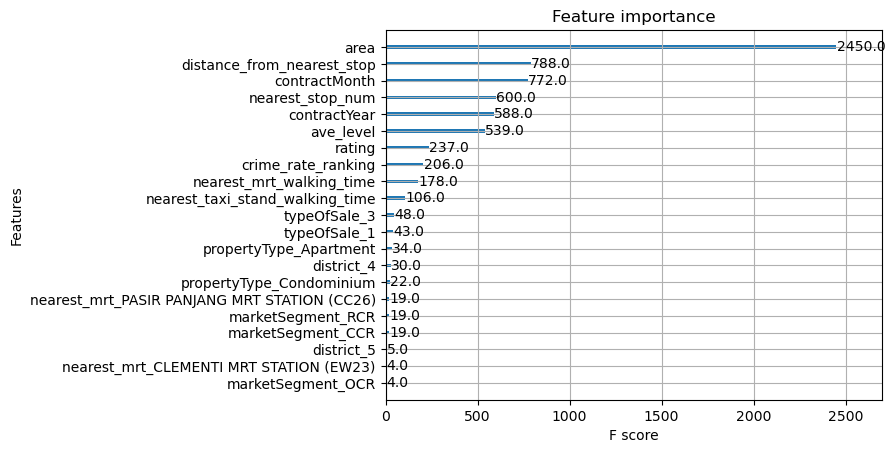

In [ ]:
# Plot feature importances
best_estimator = grid_search_mi_reg.best_estimator_
plt.figure(figsize=(50, 30))
xgb.plot_importance(best_estimator)
plt.show()

### Comparison of RMSE with Standard Deviation

In [ ]:
print('Comparison of RMSE on Test Data with Standard Deviation:')
print('Scaled Training Data Regressor: Percentage of error compared to SD:', 3150272.206219/y_test.std() * 100)
print('SelectKBest F Regressor: Percentage of error compared to SD:', 1085479.797045/y_test.std() * 100)
print('SelectKBest Mutual Info Regressor: Percentage of error compared to SD:', 1948977.991260/y_test.std() * 100)

Comparison of RMSE on Test Data with Standard Deviation:
Scaled Training Data Regressor: Percentage of error compared to SD: price    59.714831
dtype: float64
SelectKBest F Regressor: Percentage of error compared to SD: price    20.575759
dtype: float64
SelectKBest Mutual Info Regressor: Percentage of error compared to SD: price    36.943757
dtype: float64
